In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

In [5]:
df = pd.read_csv('AB_NYC_2019.csv')
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


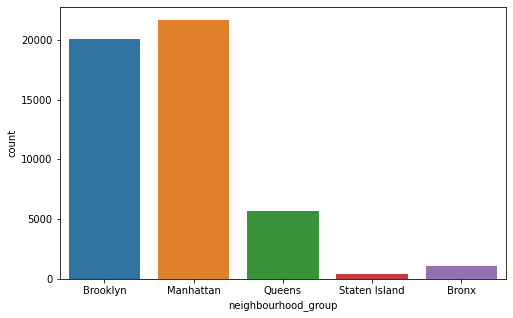

In [7]:
plt.subplots(figsize=(8, 5))
sns.countplot(df['neighbourhood_group'])
plt.show()

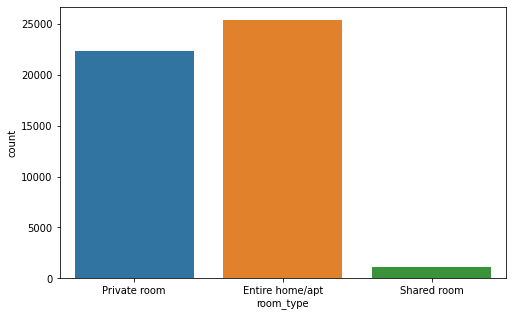

In [8]:
plt.subplots(figsize=(8, 5))
sns.countplot(df['room_type'])
plt.show()

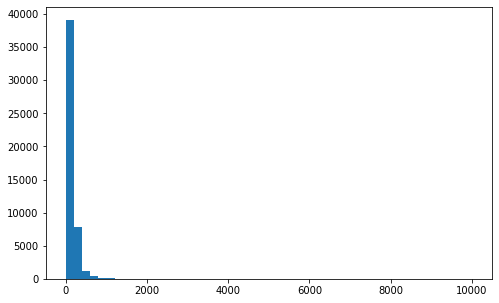

In [9]:
plt.subplots(figsize=(8, 5))
# sns.distplot(df['price'])
plt.hist(df['price'], bins=50)
plt.show()

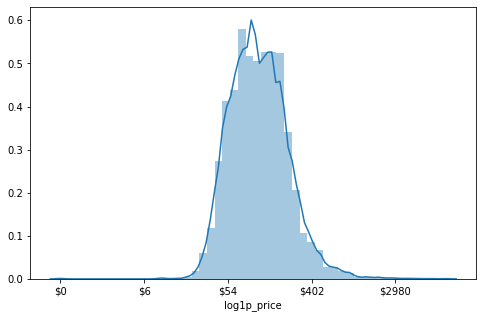

In [10]:
plt.subplots(figsize=(8, 5))
df['log1p_price'] = np.log1p(df['price'])
sns.distplot(df['log1p_price'])
x_ticks = np.arange(0, 10, 2)
plt.xticks(x_ticks, ['$%d' % x for x in np.round(np.e ** x_ticks - 1)])
plt.show()

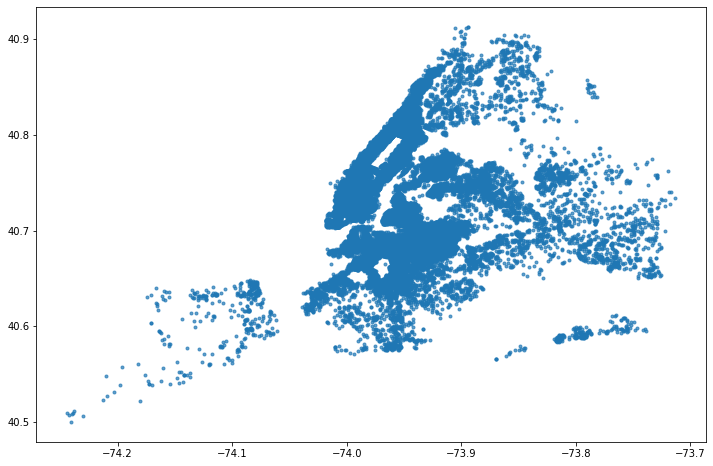

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df['longitude'], df['latitude'], s=9, alpha=.7)
plt.show()

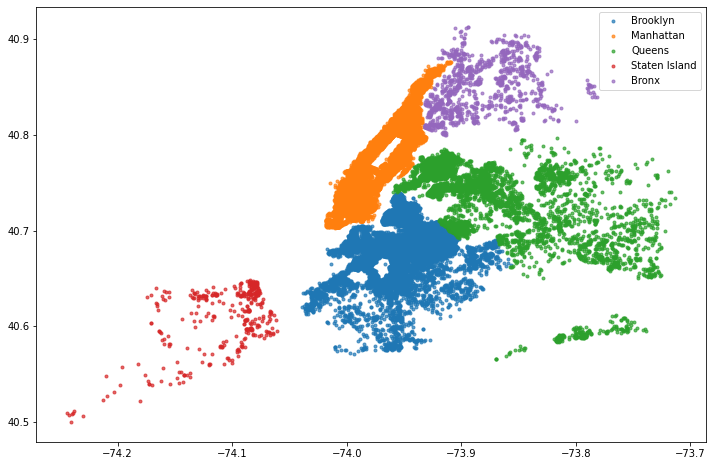

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
for n_group in df['neighbourhood_group'].drop_duplicates().tolist():
    filtered_df = df[df['neighbourhood_group'] == n_group]
    ax.scatter(filtered_df['longitude'], filtered_df['latitude'], s=9, alpha=.7, label=n_group)
    
plt.legend()
plt.show()

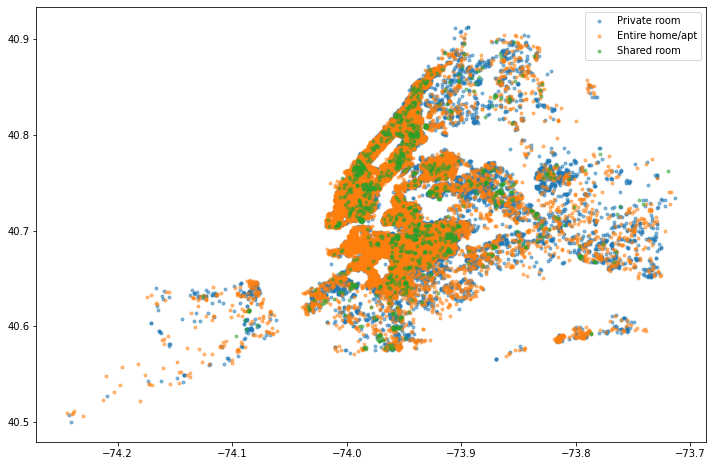

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
for room_type in df['room_type'].drop_duplicates().tolist():
    filtered_df = df[df['room_type'] == room_type]
    ax.scatter(filtered_df['longitude'], filtered_df['latitude'], s=9, alpha=.5, label=room_type)
    
plt.legend()
plt.show()

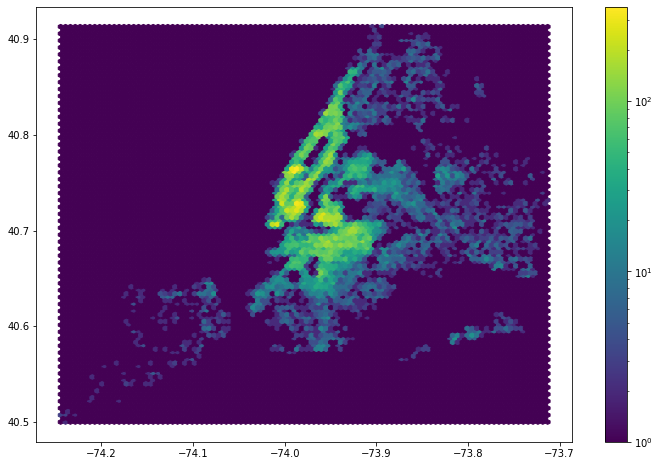

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
# ax.hist2d(df['longitude'], df['latitude'], bins=(50, 50), density=True)
hb = ax.hexbin(df['longitude'], df['latitude'], bins='log')
fig.colorbar(hb, ax=ax)
plt.show()

In [23]:
print('Mean latitude: ', df['latitude'].mean())
print('Mean longitude: ', df['longitude'].mean())

Mean latitude:  40.72894888066264
Mean longitude:  -73.95216961468454


In [35]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Heatmap

center = [40.728, -73.952]
zoom = 10

m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)

heatmap = Heatmap(
    locations=df[['latitude', 'longitude']].values.tolist(),
    radius=10
)

m.add_layer(heatmap)

m

Map(center=[40.728, -73.952], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

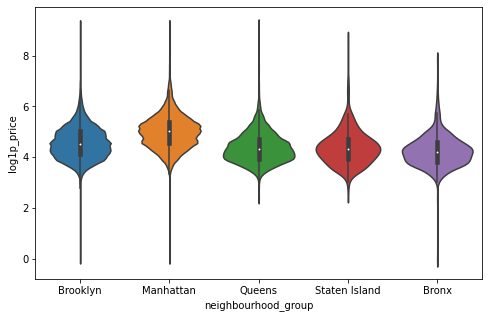

In [38]:
plt.subplots(figsize=(8, 5))
sns.violinplot(data=df, x='neighbourhood_group', y='log1p_price')
plt.show()

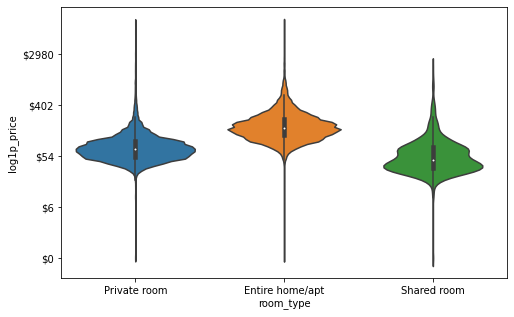

In [40]:
plt.subplots(figsize=(8, 5))
sns.violinplot(data=df, x='room_type', y='log1p_price')
y_ticks = np.arange(0, 10, 2)
plt.yticks(y_ticks, ['$%d' % x for x in np.round(np.e ** y_ticks - 1)])
plt.show()

In [46]:
f_oneway(*(df.groupby('neighbourhood_group').apply(lambda subdf: subdf['log1p_price'].values).values.tolist()))

F_onewayResult(statistic=1842.304348827498, pvalue=0.0)

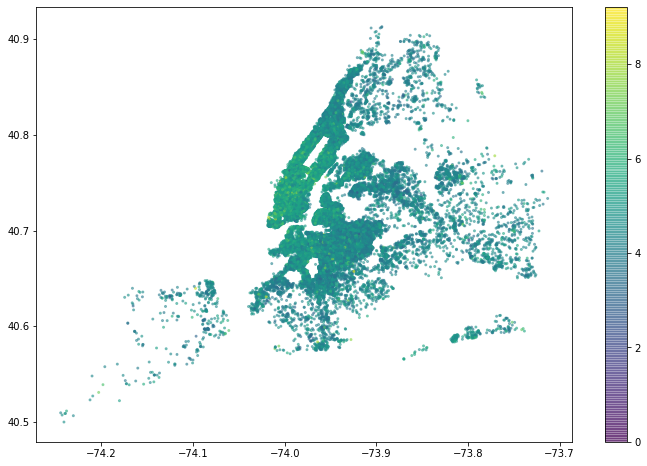

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
sp = ax.scatter(df['longitude'], df['latitude'], s=4, alpha=.5, c=df['log1p_price'])
fig.colorbar(sp, ax=ax)
plt.show()